In [1]:
import random
import os.path
import gzip
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
import pandas as pd
import numpy as np
import os

In [2]:
dataset_dir = 'C:/Users/Hyde/Projects/Jupyter Projects/data/Origin/ECoG_each_sound'
freq_list = [700,800,900,1000,1100,1200,1300,1400,1500,1600]
data_file = dataset_dir + "/sound_data_new.pkl"
with open(data_file, 'rb') as f:
    dataset = pickle.load(f)

In [3]:
sample = [dataset[700]]
len(sample)

1

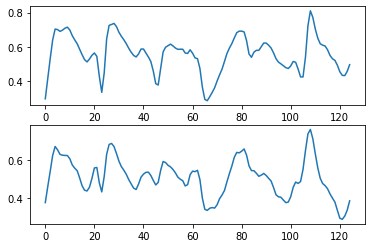

In [4]:
fig=plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ch = 0
tmp = sample[0].reshape(96,100,125)
ax1.plot(tmp[0,0,:])
ax2.plot(tmp[1,0,:])

In [5]:
sample700 = dataset[700].reshape(96,100,125).astype(np.float32)
print(sample700.shape)
print(sample700[:,:,0:124].shape)

(96, 100, 125)
(96, 100, 124)


In [16]:
print(len(dataset))
whole_train_data = []
label_train_data = []
whole_test_data = []
label_test_data = []

#sample_num = 100
#ch_num = 96
#data_length = 125
label_num = len(freq_list)

n_datapoint = 125
n_channel = 96 #ecog.shape[0]
n_epoch = 100 #int(ecog.shape[1] / n_datapoint);

for key in freq_list:
    print(key)
    print(dataset[key].shape)
#    tmp = dataset[key].reshape(96,100,125)
#    tmp = tmp[:,:,0:124]
#    ecog = tmp.reshape(96,-1)
    ecog = dataset[key].reshape(96,-1)
    ecog_data = ecog[0, :].reshape(n_epoch, n_datapoint)
    for ch in range (1, n_channel):
        ecog_data = np.append(ecog_data, ecog[ch, :].reshape(n_epoch, n_datapoint), axis=1)

    print(ecog_data.shape)
    ecog_train_data = ecog_data[0:int(n_epoch*0.8)]
    ecog_test_data = ecog_data[int(n_epoch*0.8):int(n_epoch)]
    
    if key == 700:
        print(key)
        whole_train_data = ecog_train_data.astype(np.float32)
        whole_test_data = ecog_test_data.astype(np.float32)
    else:
        whole_train_data = np.append(whole_train_data, ecog_train_data.astype(np.float32), axis=0)
        whole_test_data = np.append(whole_test_data, ecog_test_data.astype(np.float32), axis=0)
        
    label_train_data = np.append(label_train_data, np.ones(int(n_epoch*0.8))*freq_list.index(key))
    label_test_data = np.append(label_test_data, np.ones(int(n_epoch*0.2))*freq_list.index(key))

#whole_data = whole_data.reshape(ch_num,sample_num,data_length,label_num)
#label_data = label_data.reshape(label_num,sample_num)

10
700
(96, 100, 125)
(100, 12000)
700
800
(96, 100, 125)
(100, 12000)
900
(96, 100, 125)
(100, 12000)
1000
(96, 100, 125)
(100, 12000)
1100
(96, 100, 125)
(100, 12000)
1200
(96, 100, 125)
(100, 12000)
1300
(96, 100, 125)
(100, 12000)
1400
(96, 100, 125)
(100, 12000)
1500
(96, 100, 125)
(100, 12000)
1600
(96, 100, 125)
(100, 12000)


In [17]:
ecog_train_data = whole_train_data.reshape(800,96,125)
ecog_test_data = whole_test_data.reshape(200,96,125)
print(type(ecog_train_data))
print(ecog_train_data.shape)
print(ecog_test_data.shape)

<class 'numpy.ndarray'>
(800, 96, 125)
(200, 96, 125)


In [18]:
mel = np.load('data/mel60_bi.npy').reshape(1000, 384)
mel_train_data = []
mel_test_data = []
for i in range(1000):
    if i%100 < 80:
        mel_train_data.append(mel[i])
    else:
        mel_test_data.append(mel[i])

In [19]:
print(np.size(mel, 1))

384


In [20]:
print(np.size(mel_train_data, 0))

800


In [21]:
mel_train_data = np.array(mel_train_data)
mel_test_data = np.array(mel_test_data)

In [22]:
ecog_train_data = torch.from_numpy(ecog_train_data)
# type(whole_train_data)
mel_train_data = torch.from_numpy(mel_train_data)
ecog_test_data = torch.from_numpy(ecog_test_data)
mel_test_data = torch.from_numpy(mel_test_data)
# whole_train_data = whole_train_data.astype(np.double)
# whole_test_data = whole_test_data.astype(np.double)
# label_train_data = label_train_data.astype(np.double)
# label_test_data = label_test_data.astype(np.double)
print(type(ecog_train_data), type(ecog_test_data), type(mel_train_data), type(mel_test_data))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [23]:
from torch.utils.data import Dataset

In [24]:
final_train_data = TensorDataset(ecog_train_data, mel_train_data)
final_test_data = TensorDataset(ecog_test_data, mel_test_data)

In [25]:
save_file = "C:/Users/Hyde/Projects/Jupyter Projects/data/ecog_mel60_bi_dataset.pkl"
print(save_file)
print("Creating pickle file ...")
with open(save_file, 'wb') as f:
    pickle.dump([final_train_data,final_test_data], f, -1)
print("Done!")

C:/Users/Hyde/Projects/Jupyter Projects/data/ecog_mel60_bi_dataset.pkl
Creating pickle file ...
Done!


In [2]:
96000/96/125

8.0